In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import lib_explo as lib


#print(filename_ytrain)
y_train = lib.get_ytrain()
X_train = lib.get_xtrain()
X_test = lib.get_xtest()

df = pd.concat([X_train, y_train], axis=1)

In [5]:
designation = df

designation['design_len'] = designation['designation'].apply(lambda x: len(x))
designation['design_len'].describe()

count    84916.000000
mean        70.163303
std         36.793383
min         11.000000
25%         43.000000
50%         64.000000
75%         90.000000
max        250.000000
Name: design_len, dtype: float64

In [6]:
X_train.isna().sum()/X_train.shape[0]

designation    0.000000
description    0.350935
productid      0.000000
imageid        0.000000
img_shape      0.000000
img_size       0.000000
dtype: float64

In [38]:
tmp = df
tmp['description'].fillna("", inplace=True)

tmp['descr_len'] = tmp['description'].apply(lambda x: len(x))
tmp

,designation,description,productid,imageid,img_shape,img_size,prdtypecode,descr_len
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,,3804725264,1263597046,"[500, 500]",14010,10,0
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,,436067568,1008141237,"[500, 500]",14854,2280,0
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978,"[500, 500]",6898,50,760
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,,50418756,457047496,"[500, 500]",14404,1280,0
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786,"[500, 500]",20435,2705,213
...,...,...,...,...,...,...,...,...
84911,The Sims [ Import Anglais ],,206719094,941495734,"[500, 500]",48767,40,0
84912,Kit piscine acier NEVADA déco pierre Ø 3.50m x...,<b>Description complète :</b><br />Kit piscine...,3065095706,1188462883,"[500, 500]",54165,2583,1206
84913,Journal Officiel De La Republique Francaise N°...,,440707564,1009325617,"[500, 500]",16654,2280,0
84914,Table Basse Bois De Récupération Massif Base B...,<p>Cette table basse a un design unique et con...,3942400296,1267353403,"[500, 500]",19698,1560,1616


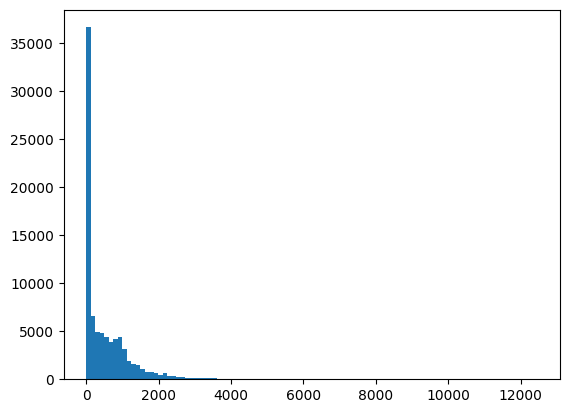

In [7]:
import matplotlib.pyplot as plt

plt.hist(tmp['descr_len'], bins=100)
plt.show()

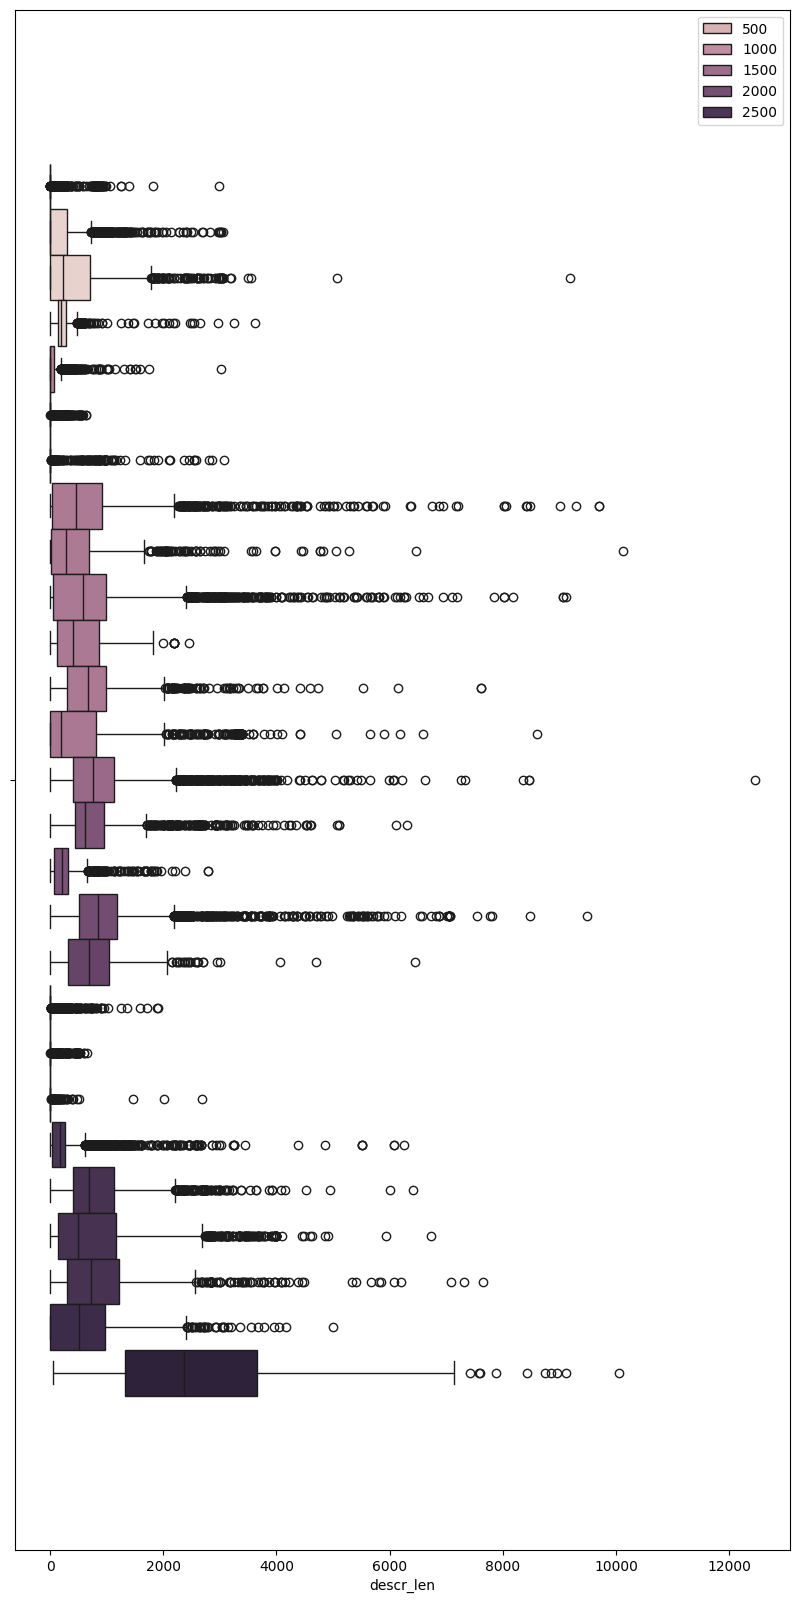

In [12]:
import seaborn as sns

plt.figure(figsize=(10, 20))
sns.boxplot(data=tmp, x='descr_len', hue='prdtypecode')
plt.legend(loc='best')
plt.show()

prdtypecode
10       27.629974
40      190.173046
50      473.734087
60      251.790865
1140     58.030700
Name: descr_len, dtype: float64

prdtypecode
10      3116
40      2508
50      1681
60       832
1140    2671
Name: count, dtype: int64

Text(0, 0.5, 'Longueur description')

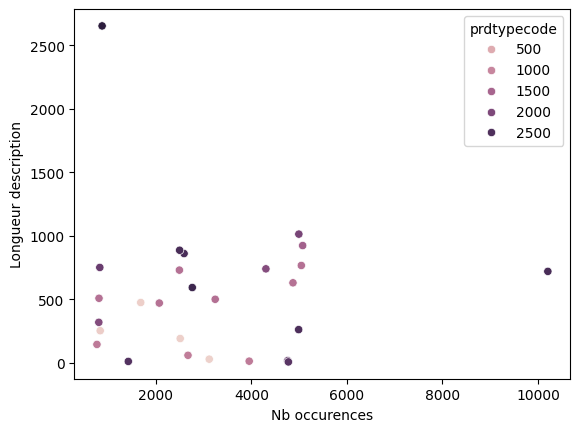

In [39]:
tmp_gb = tmp.groupby(by='prdtypecode')['descr_len'].mean()
tmp_gb = tmp_gb.sort_index()
display(tmp_gb.head())

catcode_count = tmp['prdtypecode'].value_counts().sort_index()
display(catcode_count.head())

sns.scatterplot(x = catcode_count.values, y = tmp_gb.values, hue = catcode_count.index)
plt.xlabel("Nb occurences")
plt.ylabel("Longueur description")
#plt.scatter(x=catcode_count.values, y=tmp_gb.values, color=catcode_count.index);


In [53]:
df[df.index==0]

,designation,description,productid,imageid,img_shape,img_size,prdtypecode,descr_len
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,,3804725264,1263597046,"[500, 500]",14010,10,0


In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
#import ntlk as ntlk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
#nltk.download('stopwords')

stop_word_list = stopwords.words('english') + stopwords.words('french') + stopwords.words('german')

tfidf = TfidfVectorizer(strip_accents='unicode', 
                        decode_error='ignore', 
                        stop_words=stop_word_list)
#                        token_pattern=u'(?u)\b\[a-zA-Z]\b')

tmp = df.iloc[:100,:]


matrice_tfidf = tfidf.fit_transform(tmp['designation'])
print(matrice_tfidf.shape)
vector0 = matrice_tfidf[0]
#names = tfidf.get_feature_names_out()

df_tmp = pd.DataFrame(vector0.T.todense(), index=tfidf.get_feature_names_out(), columns=['tfdif']).sort_values(by='tfdif', ascending=False)
df_tmp.head(20)

(100, 749)


[nltk_data] Downloading package stopwords to /home/ubuntu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['etaient', 'etais', 'etait', 'etant', 'etante', 'etantes', 'etants', 'ete', 'etee', 'etees', 'etes', 'etiez', 'etions', 'eumes', 'eutes', 'fumes', 'fur', 'futes', 'konnen', 'konnte', 'meme', 'uber', 'wahrend', 'wurde', 'wurden'] not in stop_words.
  warnings.warn(


,tfdif
personalisiertes,0.305937
punktraster,0.305937
seiten,0.305937
olivia,0.305937
rosen,0.305937
notizbuch,0.305937
ca,0.305937
150,0.305937
din,0.305937
a5,0.280734
